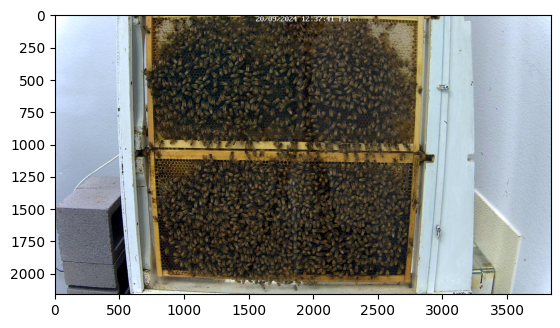

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
vid = cv2.VideoCapture('B-20240920-123746-1726861066860-7.mp4')
_, first_frame = vid.read()
# %matplotlib qt5

first_frame_rgb = cv2.cvtColor(np.copy(first_frame), cv2.COLOR_BGR2RGB)

plt.imshow(first_frame_rgb)

In [ ]:
# tl tr
# bl br
points = [np.array((590, 0)), np.array((2900, 0)),
          np.array((690, 2110)), np.array((2800, 2150))]

In [ ]:
# get max width & height
max_width = max(np.linalg.norm(points[0] - points[1]), np.linalg.norm(points[2] - points[3]))
max_height = max(np.linalg.norm(points[0] - points[2]), np.linalg.norm(points[1] - points[3]))
input_pts = np.float32(points)
output_pts = np.float32([[0, 0], [max_width-1, 0],
                        [0, max_height-1], [max_width-1, max_height-1]])

In [ ]:
M = cv2.getPerspectiveTransform(input_pts, output_pts)
M

array([[ 1.02577340e+00, -4.86148532e-02, -6.05206307e+02],
       [ 0.00000000e+00,  9.37102281e-01,  0.00000000e+00],
       [ 9.04056956e-06, -4.12968076e-05,  1.00000000e+00]])

In [ ]:
output = cv2.warpPerspective(first_frame, M, (max_width, max_height), flags=cv2.INTER_LINEAR)

output

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'warpPerspective'
> Overload resolution failed:
>  - Can't parse 'dsize'. Sequence item with index 0 has a wrong type
>  - Can't parse 'dsize'. Sequence item with index 0 has a wrong type


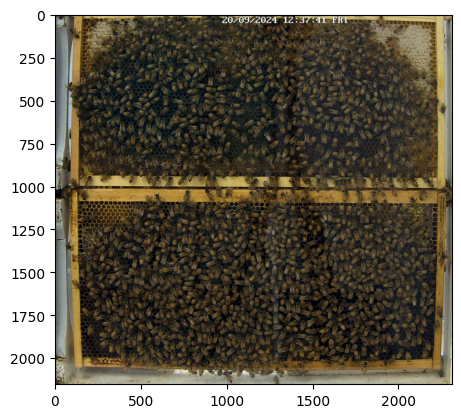

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

vid = cv2.VideoCapture('B-20240920-123746-1726861066860-7.mp4')
_, first_frame = vid.read()

first_frame_rgb = cv2.cvtColor(np.copy(first_frame), cv2.COLOR_BGR2RGB)

plt.imshow(first_frame_rgb)

# tl tr
# bl br
points = [np.array((590, 0)), np.array((2900, 0)),
          np.array((690, 2110)), np.array((2800, 2150))]

# get max width & height
max_width = int(max(np.linalg.norm(points[0] - points[1]), np.linalg.norm(points[2] - points[3])))
max_height = int(max(np.linalg.norm(points[0] - points[2]), np.linalg.norm(points[1] - points[3])))

input_pts = np.float32(points)
output_pts = np.float32([[0, 0], [max_width-1, 0],
                         [0, max_height-1], [max_width-1, max_height-1]])

# Calculate perspective transform matrix
M = cv2.getPerspectiveTransform(input_pts, output_pts)

# Warp the perspective and store the result in the 'output' variable
output = cv2.warpPerspective(first_frame, M, (max_width, max_height), flags=cv2.INTER_LINEAR)

# Show the result
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.show()
